1 Regresión lineal múltiple
Fuente de set de datos: https://www.kaggle.com/shivam2503/diamonds
Revise, antes de comenzar, la descripción del conjunto de datos con el cual va a trabajar.

### 1.1 Carga de datos

In [7]:
import pandas as pd 
data_frame = pd.read_csv("diamonds.csv")
data_frame.head() 


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
# Cantidad de obsevaciones 
data_frame.shape

(53940, 11)

In [9]:
data_frame.dtypes 

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [10]:
# Se descarta la primera columna porque no tiene valor predictivo data_frame = data_frame.drop(["Unnamed: 0"],axis=1) 
data_frame.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
 # Medidas estadísticas 
data_frame.describe() 

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [27]:
# Considerando solo las columnas de tipo object 
import numpy as np 
data_frame.describe(include=[np.object]) 

/tmp/ipykernel_78/912498289.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_frame.describe(include=[np.object])


,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [63]:
# Considerando solo las columnas de tipo object 
import numpy as np 
data_frame.describe(include=[np.object]) 

/tmp/ipykernel_78/912498289.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_frame.describe(include=[np.object])


,cut,color,clarity
count,53920,53920,53920
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13063


In [69]:
# Valores nulos 
for feature in data_frame.columns: 
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum()) 

Total de valores nulos de Unnamed: 0 = 0
Total de valores nulos de carat = 0
Total de valores nulos de cut = 0
Total de valores nulos de color = 0
Total de valores nulos de clarity = 0
Total de valores nulos de depth = 0
Total de valores nulos de table = 0
Total de valores nulos de price = 0
Total de valores nulos de x = 0
Total de valores nulos de y = 0
Total de valores nulos de z = 0


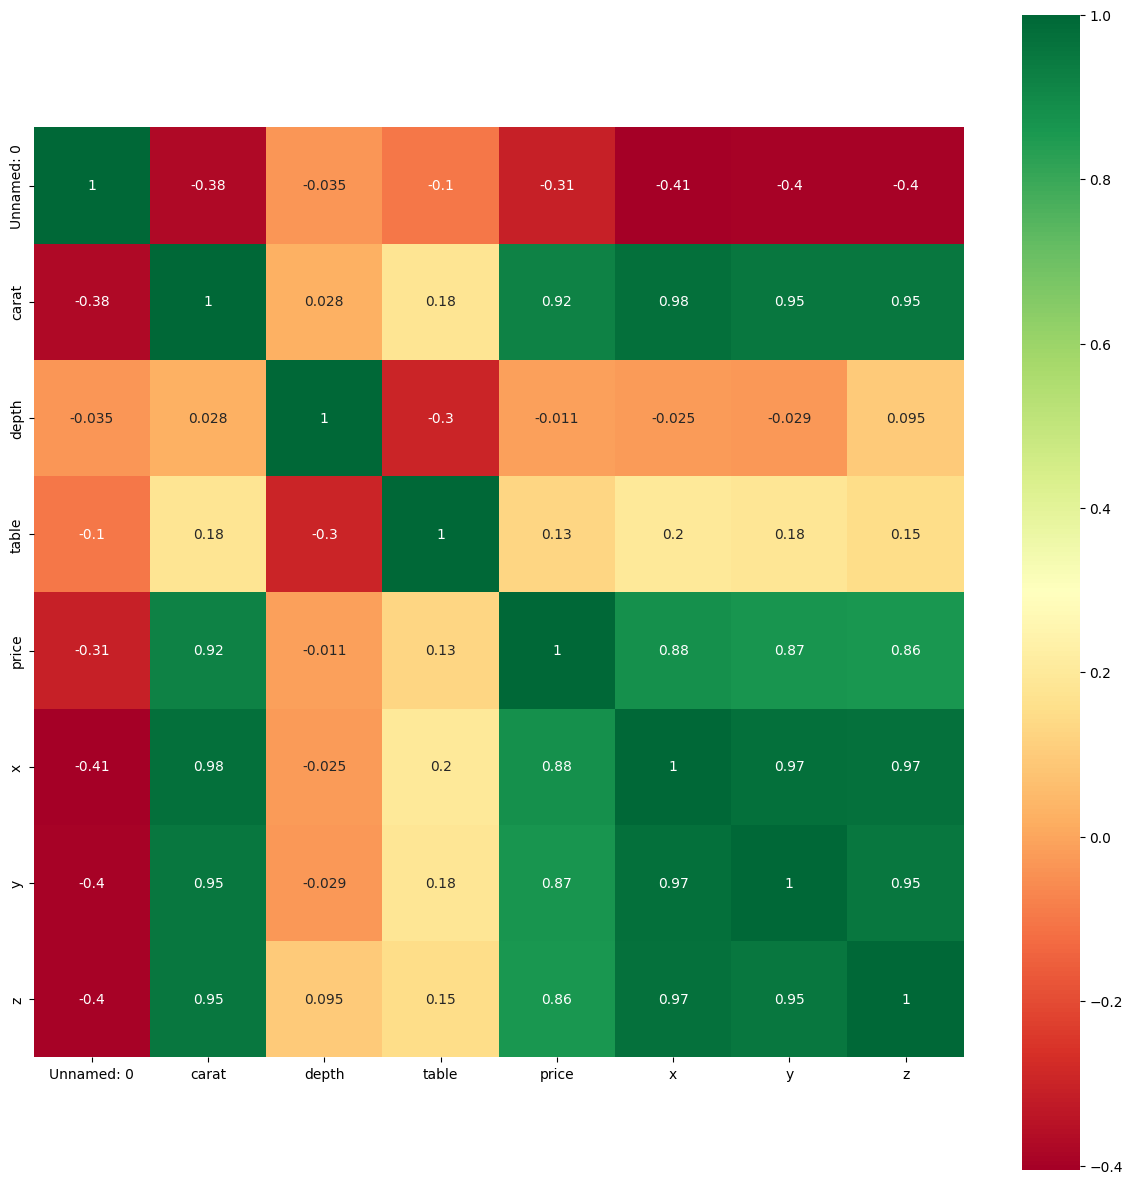

In [34]:
 ## Correlación de las variables
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
p=sns.heatmap(data_frame.corr(), annot=True,cmap='RdYlGn',square=True)

Comentarios de gráfico 
• La columna ‘carat’ posee la mayor correlación (0.92) 
• x, y, z tienen una correlación bastante alta con el precio 


/tmp/ipykernel_78/1683508248.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[col], ax=ax[0], kde=False)
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


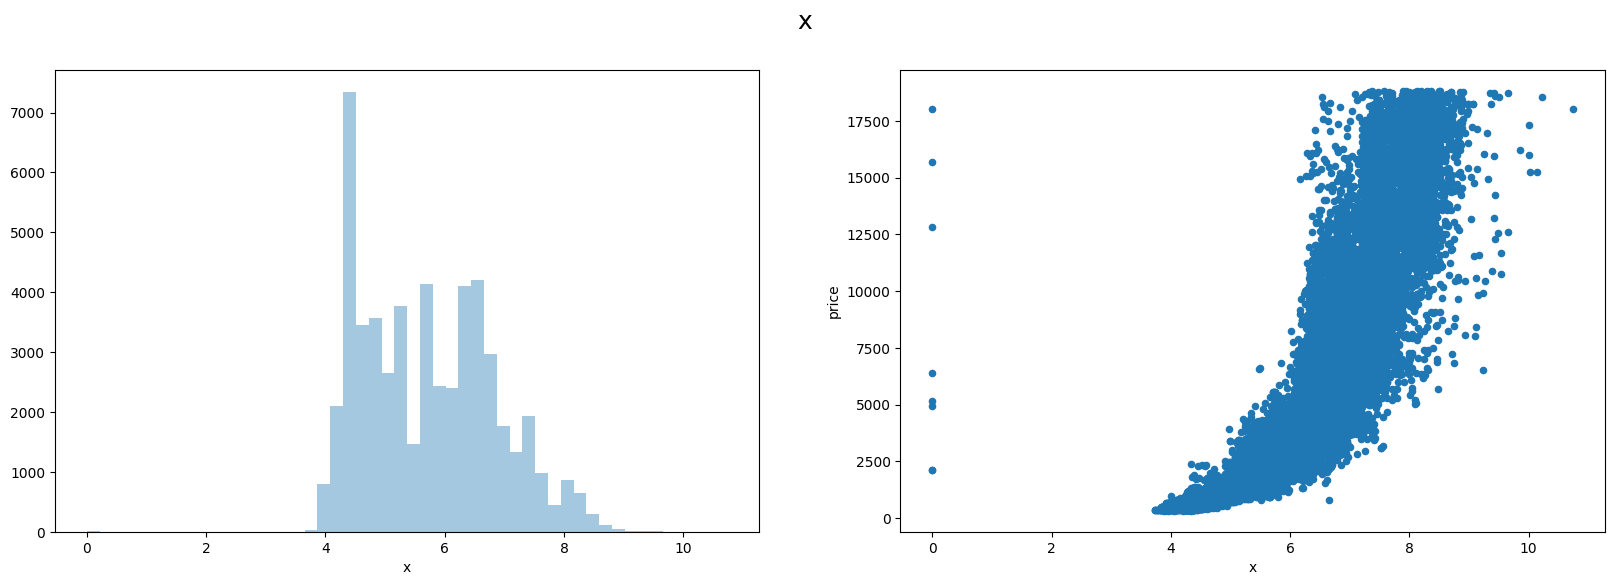

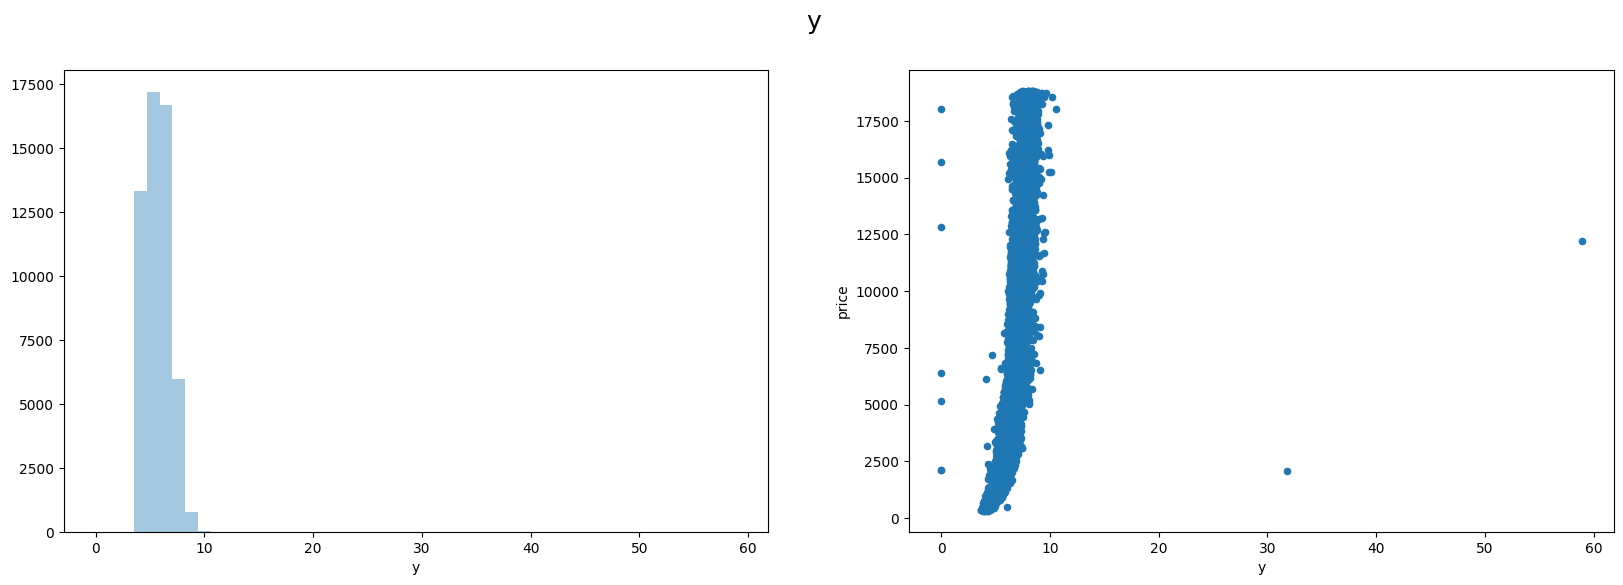

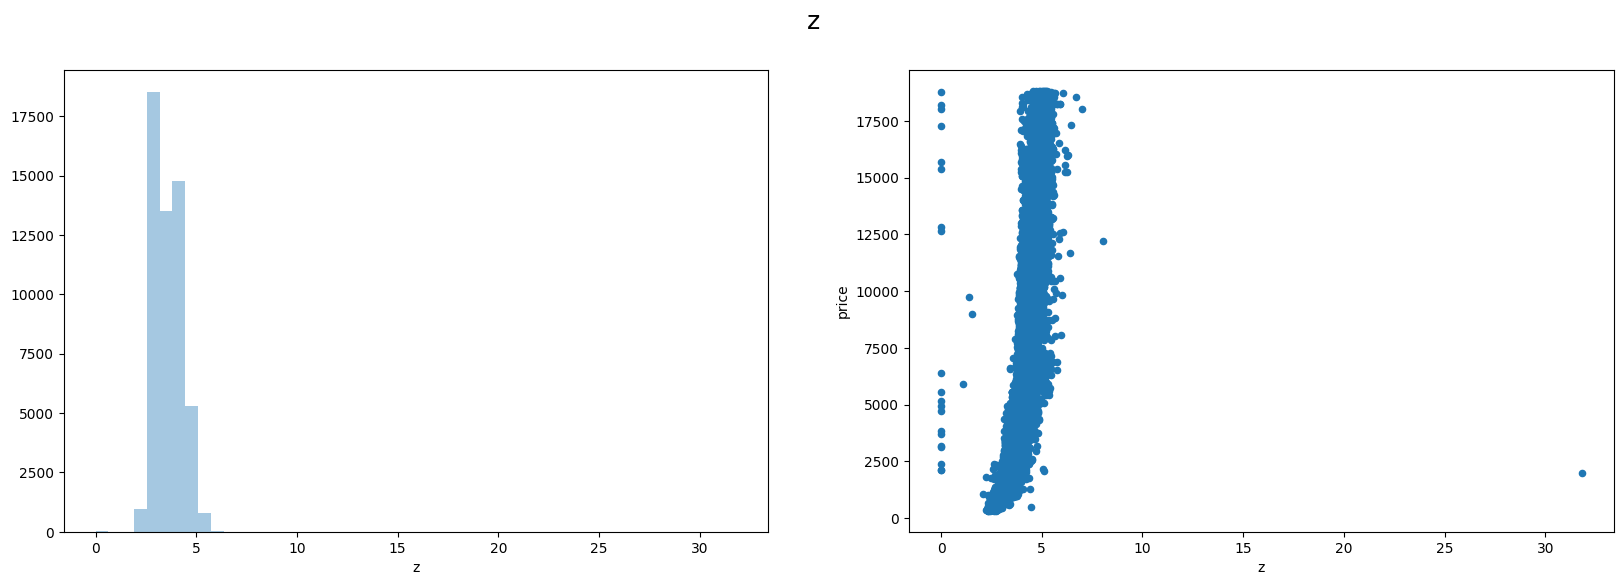

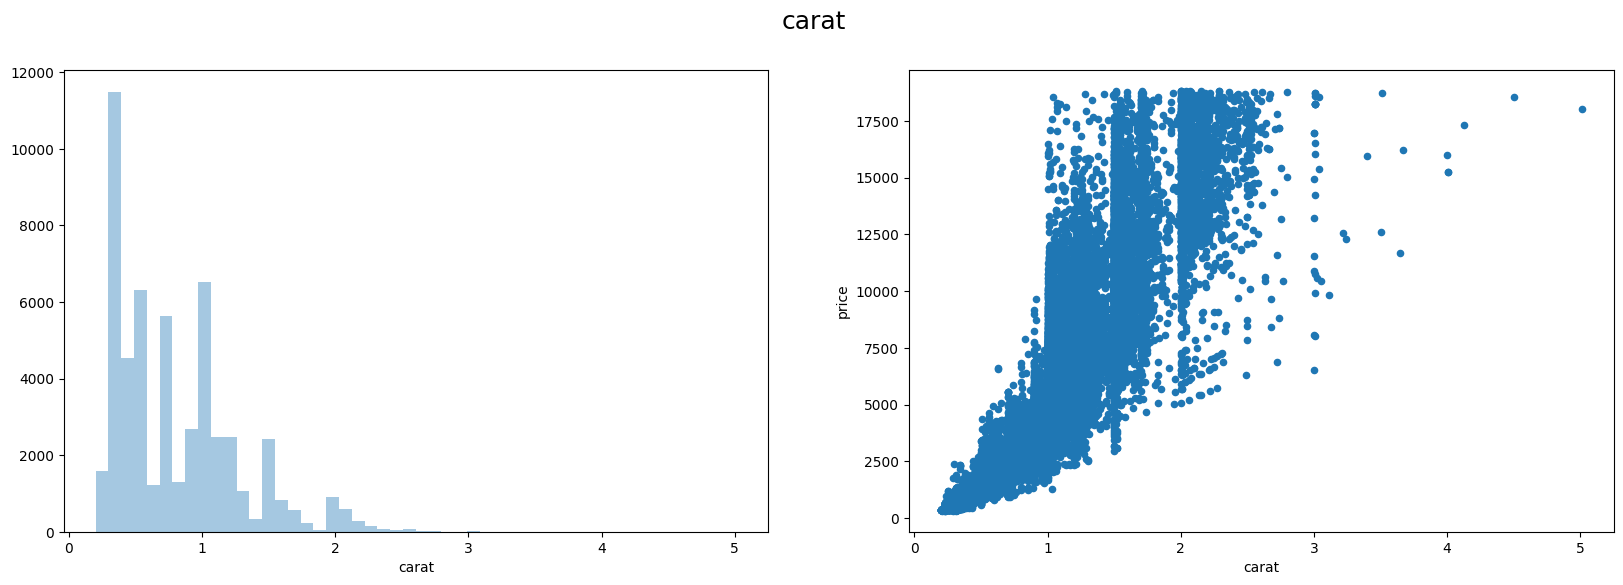

In [38]:
for col in ['x', 'y', 'z', 'carat']: 
    fig, ax =plt.subplots(1, 2, figsize=(20, 6)) 
    fig.suptitle(col, fontsize=18) 
    sns.distplot(data_frame[col], ax=ax[0], kde=False) 
    data_frame[[col]+['price']].plot.scatter(x=col, y='price', ax=ax[1]) 
    plt.show() 

In [40]:
data_frame = data_frame[(data_frame[['x','y','z']] != 0).all(axis=1)] 
data_frame.shape 

(53920, 11)

/tmp/ipykernel_78/3430813467.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame[col], ax=ax[0], kde=False)
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


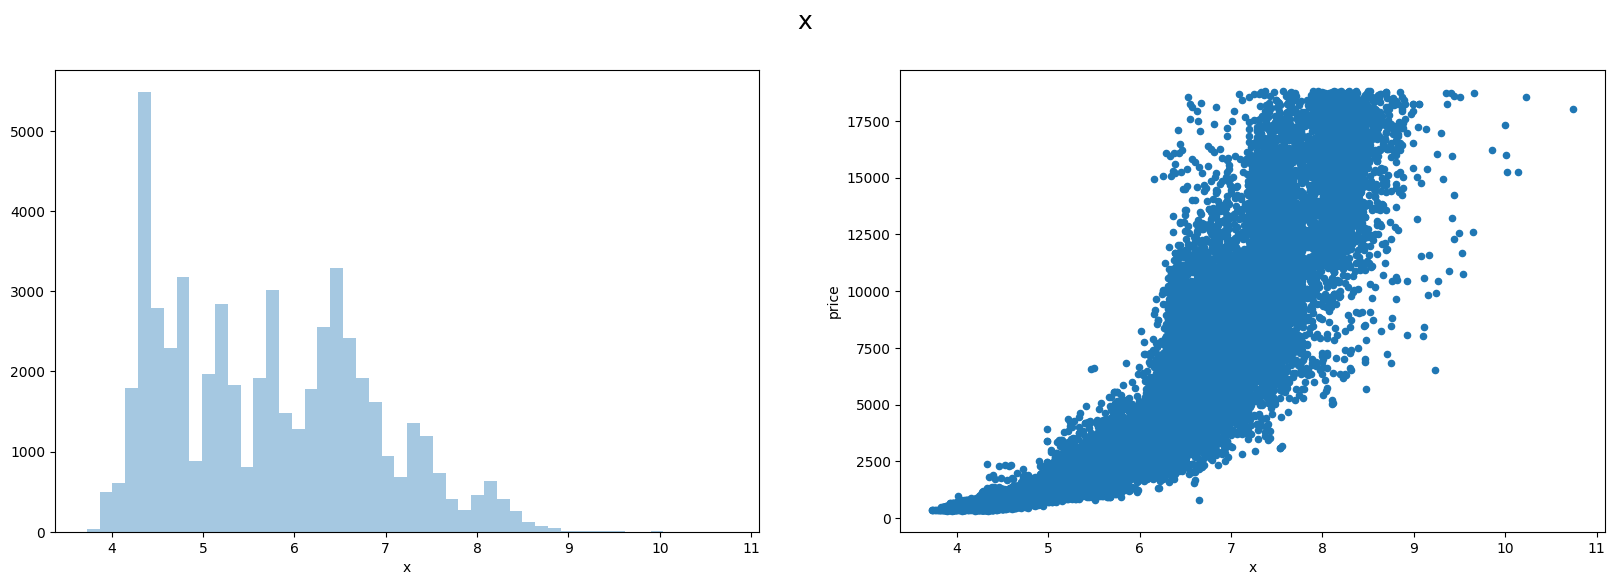

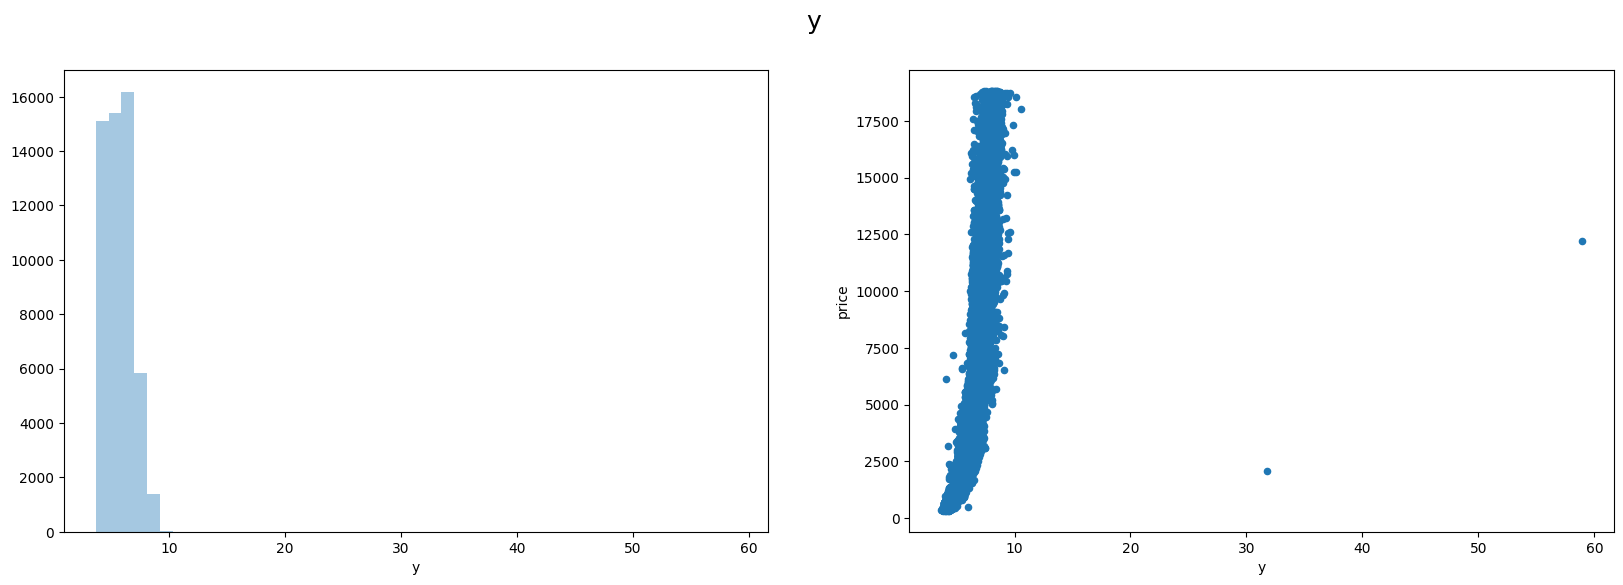

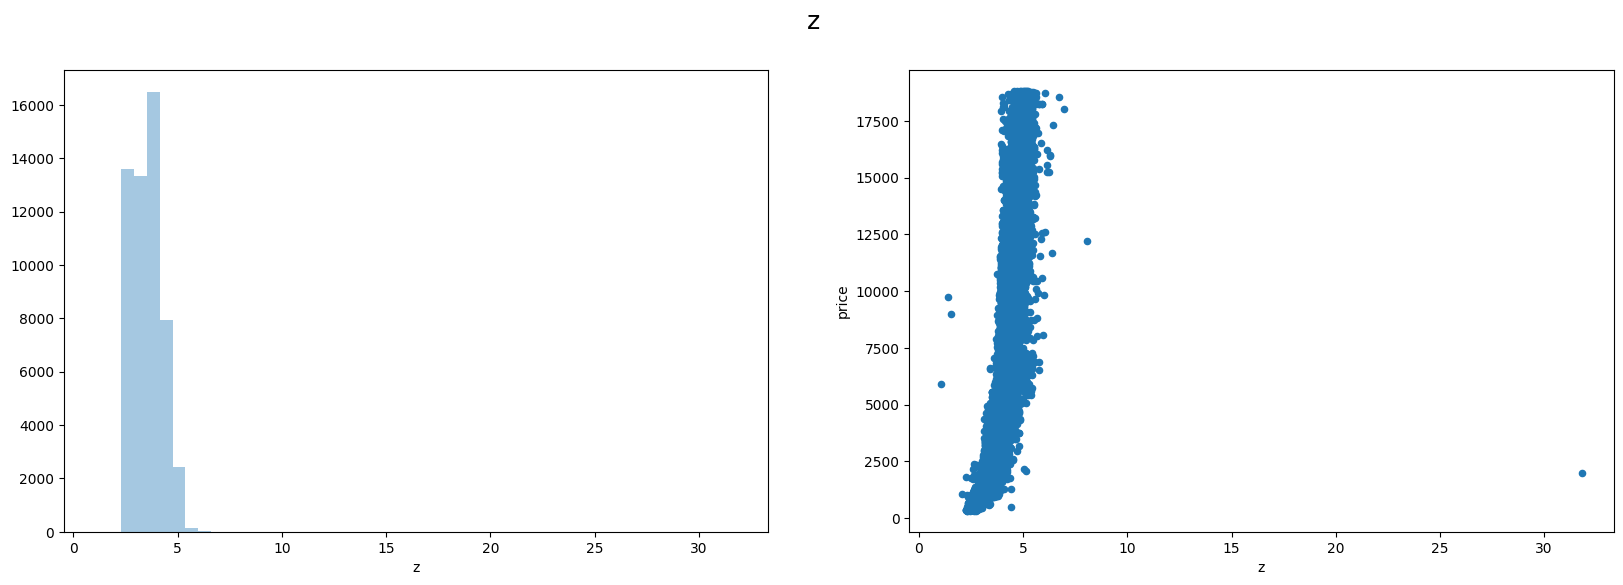

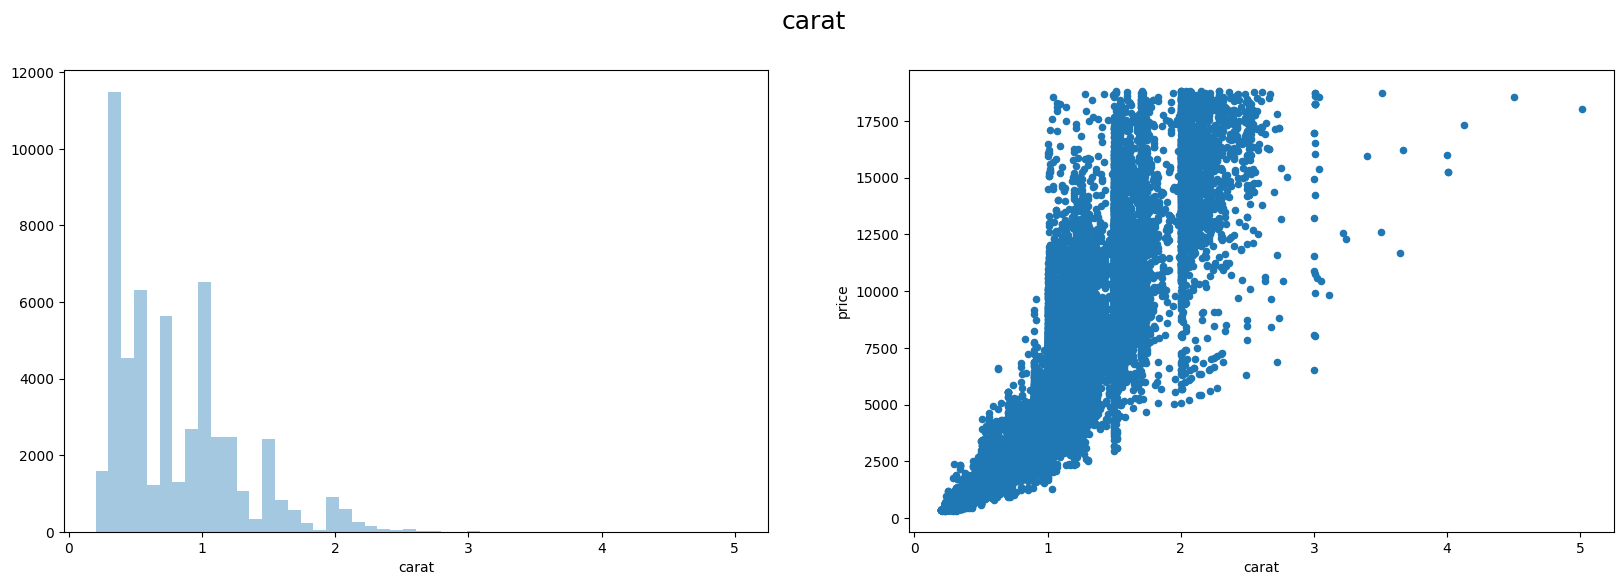

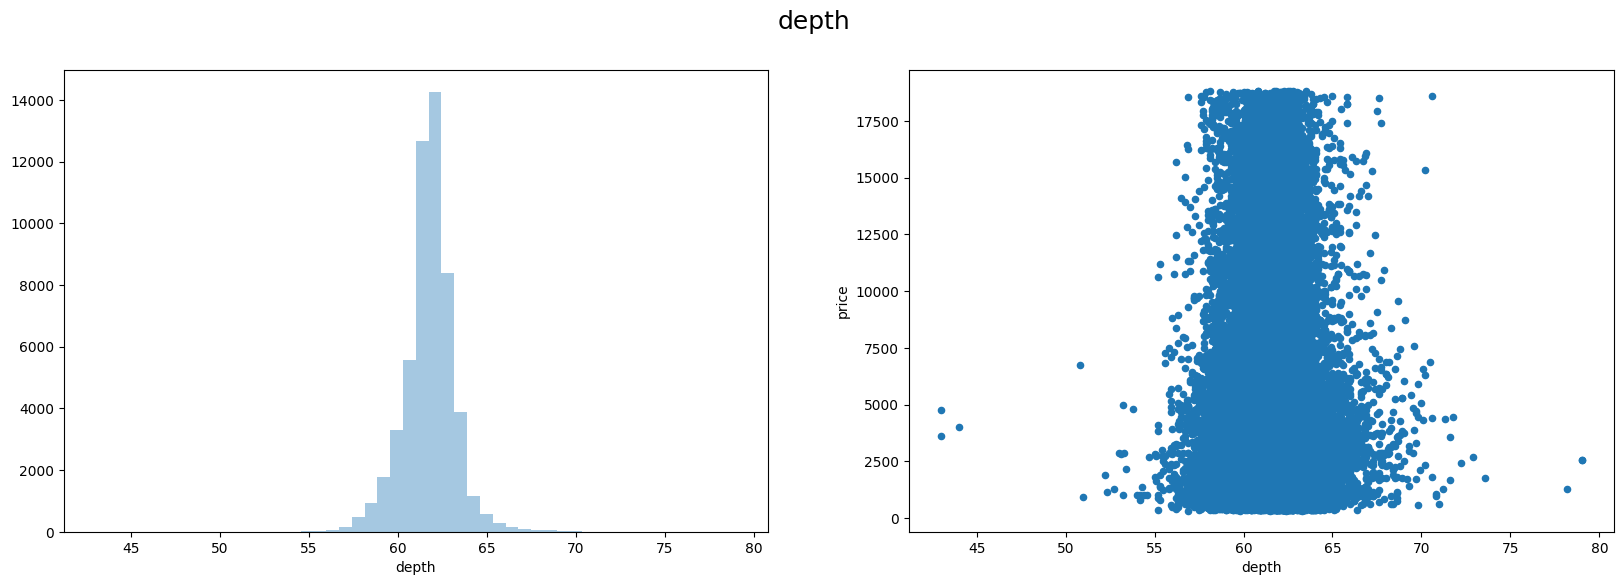

In [42]:
# Visualizamos la distribución de las variables 
columnas = ['x', 'y', 'z', 'carat', 'depth'] 
for col in columnas: 
    fig, ax =plt.subplots(1, 2, figsize=(20, 6)) 
    fig.suptitle(col, fontsize=18) 
    sns.distplot(data_frame[col], ax=ax[0], kde=False) 
    data_frame[[col]+['price']].plot.scatter(x=col, y='price', ax=ax[1]) 
    plt.show() 


 Tratamiento de variables categóricas 
Es importante recordar que estas variables no han sido consideradas en el análisis de correlación anterior porque no son numéicas; así es que conveniente considerarlas 
Primero se van a revisar los valores únicos de cada variable categórica. 
Luego se van a transformar usando onehot-encoder 


In [43]:
data_frame['cut'].unique() 

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [45]:
data_frame['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [46]:
data_frame['clarity'].unique() 

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [48]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['cut'])],remainder='passthrough') 
X = np.array(ct.fit_transform(data_frame)) 
pd.DataFrame(X) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,1.0,0.0,0.0,1,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.0,0.0,0.0,1.0,0.0,2,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.0,1.0,0.0,0.0,0.0,3,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.0,0.0,0.0,1.0,0.0,4,0.29,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.0,1.0,0.0,0.0,0.0,5,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53915,0.0,0.0,1.0,0.0,0.0,53936,0.72,D,SI1,60.8,57.0,2757,5.75,5.76,3.5
53916,0.0,1.0,0.0,0.0,0.0,53937,0.72,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53917,0.0,0.0,0.0,0.0,1.0,53938,0.7,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53918,0.0,0.0,0.0,1.0,0.0,53939,0.86,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Se separan las variables predictoras y la predecida
x = data_frame[['x','y', 'z', 'carat']] # Variables independientes
y = data_frame['price'] # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=29)
# Tipo de modelo
modelo = LinearRegression()

In [54]:
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)
# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo.score(X_train, y_train))

R2 :0.85
MSE: 2424851.71
Score del modelo : 0.86


Realizando predicciones 

In [55]:
print(modelo.predict([[4.15, 3.95, 2.25, 0.29]]))

[657.29432223]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mejoras

Ya se generó un modelo de predicción del precio de un diamante considerando su alto, ancho,
profundidad y peso del diamante.

Sin embargo, estas variables no están normalizadas. El desafío ahora es repetir el ejercicio con-
siderando las variables normalizadas.

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_selected = data_frame[['x','y', 'z', 'carat']]
scaled_data = sc.fit_transform(data_selected)
pd.DataFrame(scaled_data).head()

,0,1,2,3
0,-1.591573,-1.539219,-1.580084,-1.198204
1,-1.645173,-1.662014,-1.750896,-1.240417
2,-1.502241,-1.460280,-1.750896,-1.198204
3,-1.368242,-1.319943,-1.295396,-1.071566
4,-1.243176,-1.214690,-1.124583,-1.029353


In [59]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y,test_size=0.2,random_state=29)

In [60]:
# Tipo de modelo
modelo_x = LinearRegression()
# Entrenamiento del modelo
modelo_x.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo_x.predict(X_test)
# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo_x.score(X_train, y_train))

R2 :0.85
MSE: 2424851.71
Score del modelo : 0.86


In [61]:
# Se realiza la misma predicción anterior
print(modelo.predict([[4.15, 3.95, 2.25, 0.29]]))

[657.29432223]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df97ea13-2a87-4573-aaa7-664167317a2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>